In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import spacy

from tqdm.autonotebook import tqdm
tqdm.pandas()

<ipython-input-3-4ecdfd35d43f>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
csv_path = 'all_hate.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

In [7]:
nlp = spacy.load('en_core_web_md') # remove three tasks so as to speed up the precess 
nlp.max_length = 1100000

def nlp_preprocess(caption):
    doc = nlp(caption)
    lemmanized_list = []
    lemmanized_phrase = ''
    for token in doc:
        if not token.is_punct and not token.is_stop and not token.is_oov and token.lemma_ != "-PRON-": # check is token is not punctutation stop word and in the nlp vocab
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or (token.pos_ == 'VERB' and len(token.orth_) > 5):
                # print(token.orth_, token.pos_, token.lemma_.lower().strip())
                lemmanized_list.append(token.lemma_.lower().strip()) 
    lemmanized_phrase = ' '.join(lemmanized_list)
    return lemmanized_phrase

In [68]:
phase = 'know kill vote shit'
nlp_preprocess(phase)

vote NOUN vote
shit NOUN shit


'vote shit'

In [9]:
df_csv['image_text'] = df_csv['image_text'].fillna('')
df_csv['image_text'] = df_csv['image_text'].astype('string')
df_csv['image_text'] = df_csv['image_text'].progress_apply(nlp_preprocess)
# df_csv['image_text'] = df_csv['image_text'].apply(lambda x: ','.join([w for w in x.split()]))
df_csv['image_text'] = df_csv['image_text'].apply(lambda x: ','.join([w for w in x.split() if len(w)>2]))

  0%|          | 0/26685 [00:00<?, ?it/s]

In [11]:
df_csv.to_csv('all_hate_nlp.csv', index=False)

## Start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [58]:
topic = 'all'
csv_path = 'all_hate_nlp.csv'

df_csv = pd.read_csv(csv_path, index_col=False)
df_csv['image_text'] = df_csv['image_text'].fillna('')
df_csv['image_text'] = df_csv['image_text'].astype('string')

if topic != 'all':
    df_csv = df_csv.loc[df_csv['topic'] == topic]

In [59]:
obj_dict = {}

def count_objs(obj_str):
    if obj_str == '':
        return

    li = obj_str.split(',')
    for item in li:
        if item in obj_dict:
            obj_dict[item] += 1
        else:
            obj_dict[item] = 1

df_csv['image_text'].apply(count_objs)

0        None
1        None
2        None
3        None
4        None
         ... 
26680    None
26681    None
26682    None
26683    None
26684    None
Name: image_text, Length: 26685, dtype: object

In [60]:
N = 20
top_dict = dict(sorted(obj_dict.items(), key = itemgetter(1), reverse = True)[:N])

In [61]:
len_all = len(df_csv.index)
top_dict_per = {}

for key, val in top_dict.items():
    top_dict_per[key] = val / len_all

In [62]:
df_top_per = pd.DataFrame(top_dict_per.items(), columns=['Object', 'Percentage'])
csv_path = 'plot_data/text_top_' + topic + '.csv'
df_top_per.to_csv(csv_path, index=False)

In [138]:
topic = 'all'
csv_path = 'plot_data/text_top_' + topic + '.csv'
df_top_per = pd.read_csv(csv_path, index_col=False)

In [139]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

<Figure size 640x480 with 0 Axes>

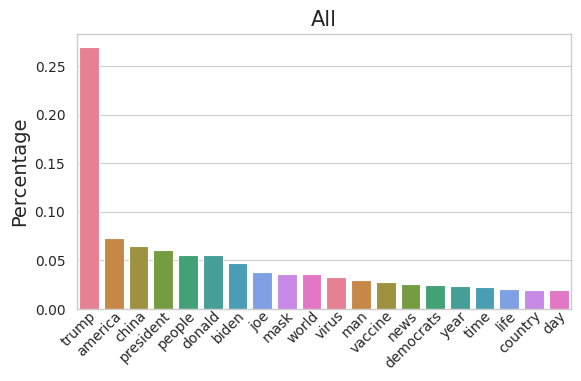

In [142]:
plt.clf()
plt.figure(figsize=(6,4), tight_layout=True)
# plt.bar(df_top_per.Object, df_top_per.Percentage, width=0.7)

ax = sns.barplot(data=df_top_per, x='Object', y='Percentage', palette=sns.color_palette('husl', 10))
ax.tick_params(axis='x', which='major', pad=-5)
plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.xlabel(None)
plt.title(topic.capitalize(), fontsize=15)

# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.5)

fig_path = 'plot_data/plots/text_bar_' + topic + '.png'
plt.savefig(fig_path)
plt.show()


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
df_csvs = {}
for topic in topics:
    csv_path = 'plot_data/text_top_' + topic + '.csv'
    df = pd.read_csv(csv_path, index_col=False)
    df_csvs[topic] = df

In [131]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

<Figure size 640x480 with 0 Axes>

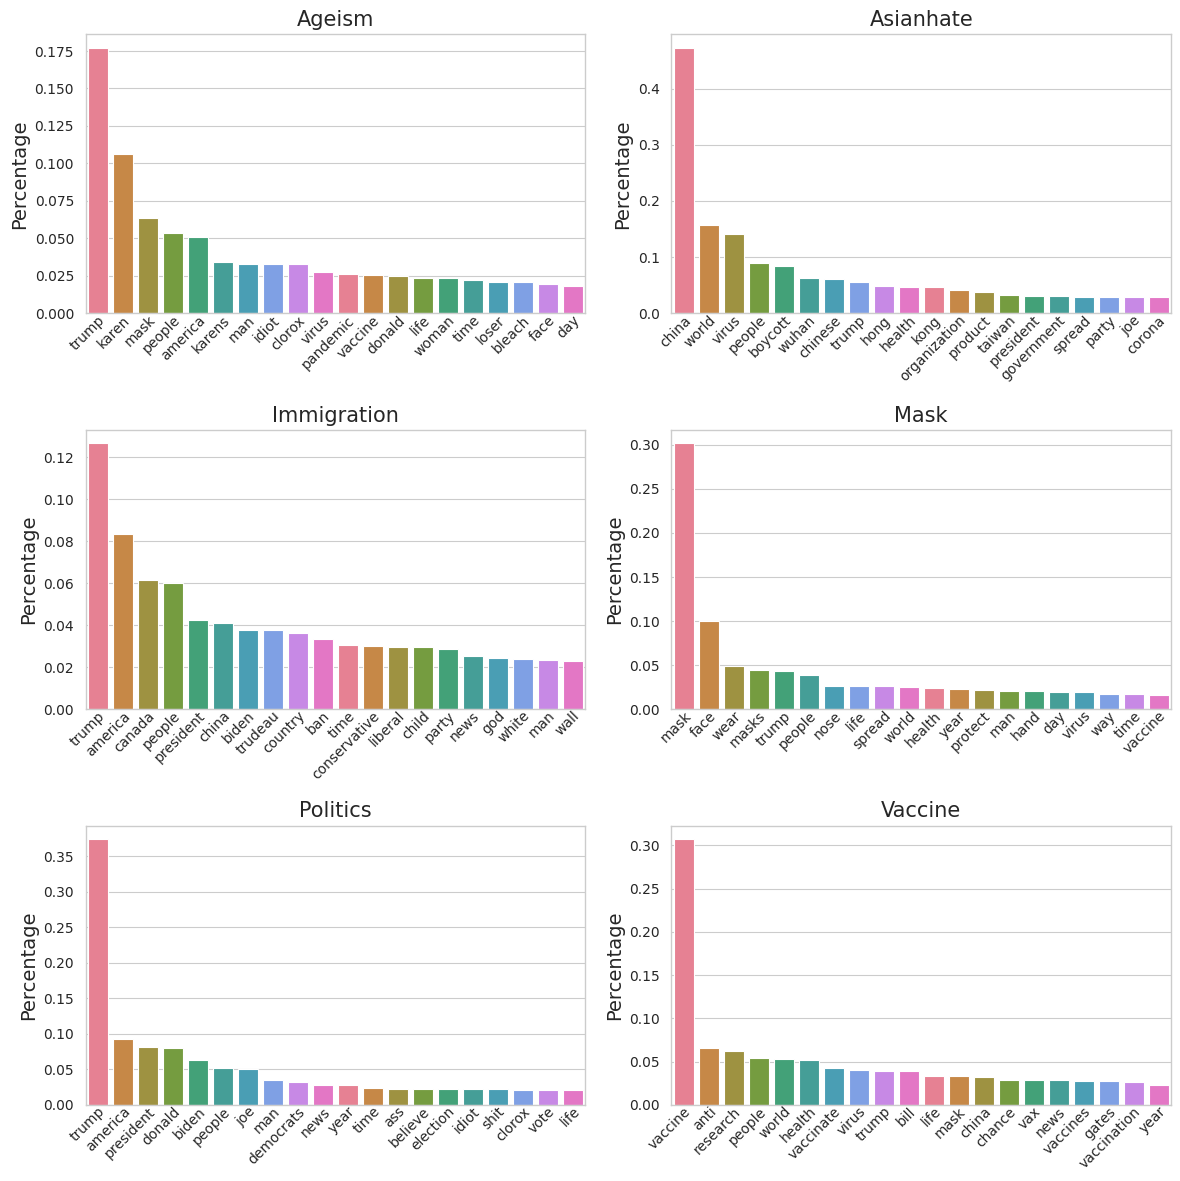

In [137]:
plt.clf()
fig, axes = plt.subplots(3, 2, figsize=(12, 12), tight_layout=True)

for idx, topic in enumerate(topics):
    i = int(idx / 2)
    j = idx % 2
    
    df = df_csvs[topic]

    # ax[i][j].pie(df['percentage_norm'], labels=df['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)
    # ax[i][j].set_title(topic.capitalize(), fontsize=18)
    # plt.setp(ax[i][j].get_xticklabels(), ha='center', va='center', ma='center')

    ax = sns.barplot(ax=axes[i][j], data=df, x='Object', y='Percentage', palette=sns.color_palette('husl', 10))
    ax.tick_params(axis='x', which='major', pad=-5)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    axes[i][j].set_xlabel(None)
    axes[i][j].set_title(topic.capitalize(), fontsize=15)
    

fig_path = 'plot_data/plots/text_bar_others.png'
plt.savefig(fig_path)
plt.show()

## Pie Chart

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
topic = 'all'
csv_path = 'plot_data/text_top_' + topic + '.csv'
df_top_per = pd.read_csv(csv_path, index_col=False)
df_top_per = df_top_per[:10]

In [93]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
df_csvs = {}
for topic in topics:
    csv_path = 'plot_data/text_top_' + topic + '.csv'
    df = pd.read_csv(csv_path, index_col=False)
    df = df[:10]
    per_total = df['Percentage'].sum()
    df['percentage_norm'] = df['Percentage'].apply(lambda x: x / per_total)
    df_csvs[topic] = df

In [120]:
per_total = df_top_per['Percentage'].sum()
df_top_per['percentage_norm'] = df_top_per['Percentage'].apply(lambda x: x / per_total)

In [121]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

<ipython-input-128-1587089b3b95>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax = plt.pie(df_top_per['percentage_norm'], labels=df_top_per['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)


<Figure size 640x480 with 0 Axes>

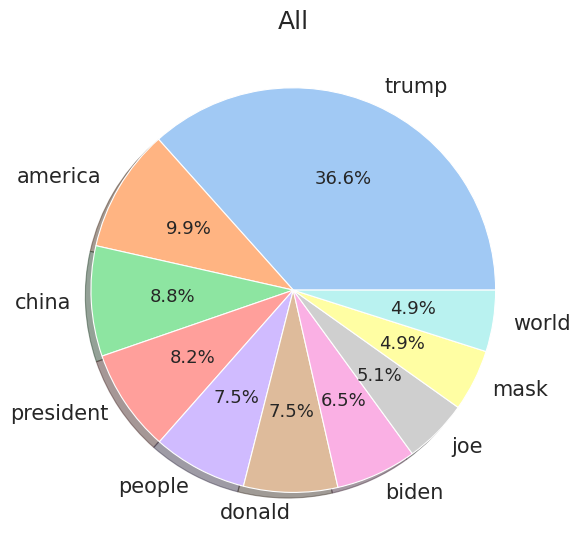

In [128]:
plt.clf()
plt.figure(figsize=(6,6), tight_layout=True)
# plt.bar(df_top_per.Object, df_top_per.Percentage, width=0.7)

ax = plt.pie(df_top_per['percentage_norm'], labels=df_top_per['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)
# ax = sns.barplot(data=df_top_per['Object'], x='Object', y='Percentage', palette=sns.color_palette('husl', 10))
# ax.tick_params(axis='x', which='major', pad=-5)
# plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title(topic.capitalize(), fontsize=18)

# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.5)

fig_path = 'plot_data/plots/text_pie_' + topic + '.png'
plt.savefig(fig_path)
plt.show()

In [105]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)      

<Figure size 640x480 with 0 Axes>

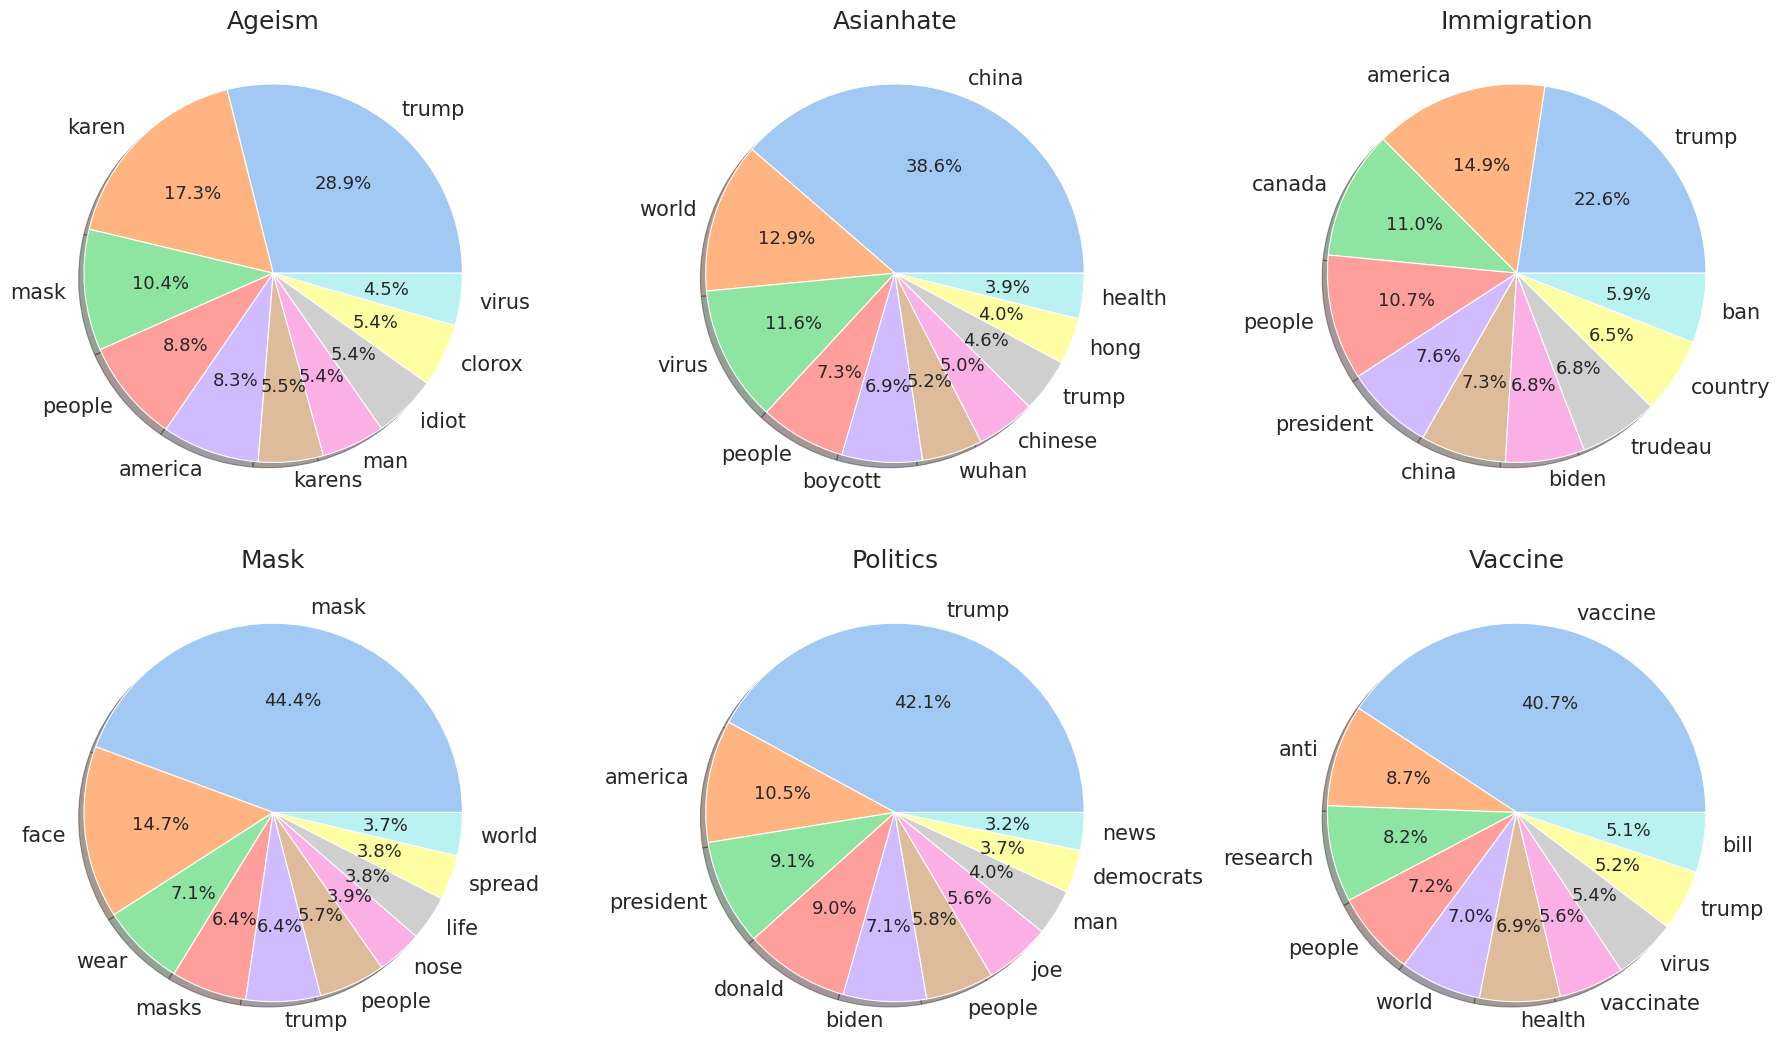

In [118]:
plt.clf()
fig, ax = plt.subplots(2, 3, figsize=(18, 12), tight_layout=True)

for idx, topic in enumerate(topics):
    i = int(idx / 3)
    j = idx % 3
    
    df = df_csvs[topic]

    ax[i][j].pie(df['percentage_norm'], labels=df['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)
    ax[i][j].set_title(topic.capitalize(), fontsize=18)
    plt.setp(ax[i][j].get_xticklabels(), ha='center', va='center', ma='center')

fig_path = 'plot_data/plots/text_pie_others.png'
plt.savefig(fig_path)
plt.show()